<a href="https://colab.research.google.com/github/zahrasa/Detection-and-Classification-of-Distributed-DoS-Attacks-using-Machine-Learning/blob/master/DDOS_XGBoost%2C_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
%%capture

import os
import glob
import numpy as np
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Download the clean data obtained in the pre-processing stage

In [ ]:
# !pip install --upgrade --no-cache-dir gdown

# Download the dataset
# ! rm -rf * 
# ! gdown --id

In [ ]:
df = pd.read_csv('clean_ddos.csv')

# Visualize dataset

In [ ]:
df['Label'].value_counts()

1    167431
5    164718
3    111071
4     73569
6     53392
0      7950
2      3383
7       977
Name: Label, dtype: int64

In [ ]:
(df['Label'].value_counts()) / len(df) * 100

1    28.743963
5    28.278205
3    19.068277
4    12.630066
6     9.166150
0     1.364828
2     0.580782
7     0.167728
Name: Label, dtype: float64

In [ ]:
# Visualize labels
import plotly.graph_objects as go
def plot_distribution(pd_series):
    labels = pd_series.value_counts().index.tolist()
    counts = pd_series.value_counts().values.tolist()
    
    pie_plot = go.Pie(labels=labels, values=counts, hole=.3)
    fig = go.Figure(data=[pie_plot])
    fig.update_layout(title_text='Distribution for %s' % pd_series.name)
    
    fig.show()

In [ ]:
plot_distribution(df['Label'] )

# ('BENIGN', '0')
# ('NetBIOS', '1')
# ('LDAP', '2')
# ('MSSQL', '3')
# ('Portmap', '4')
# ('Syn', '5')
# ('UDP', '6')
# ('UDPLag', '7')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582491 entries, 0 to 582490
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   582491 non-null  int64  
 1   SourceIP                     582491 non-null  int64  
 2    Source Port                 582491 non-null  int64  
 3   DestinationIP                582491 non-null  int64  
 4    Destination Port            582491 non-null  int64  
 5    Protocol                    582491 non-null  int64  
 6    Flow Duration               582491 non-null  int64  
 7    Total Fwd Packets           582491 non-null  int64  
 8    Total Backward Packets      582491 non-null  int64  
 9   Total Length of Fwd Packets  582491 non-null  float64
 10   Fwd Packet Length Max       582491 non-null  float64
 11   Fwd Packet Length Std       582491 non-null  float64
 12  Bwd Packet Length Max        582491 non-null  float64
 13 

In [ ]:
print('ddos csv shape = ', df.shape)
print('number of columns before feature selection:', len(df.columns), '\n')
df.columns

ddos csv shape =  (582491, 40)
number of columns before feature selection: 40 



Index(['Unnamed: 0', 'SourceIP', ' Source Port', 'DestinationIP',
       ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Mean', ' Bwd IAT Min', ' Fwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Packet Length Std', ' Packet Length Variance',
       ' Down/Up Ratio', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       'Active Mean', ' Active Std', ' Active Max', ' Active Min', ' Idle Std',
       'SimillarHTTP', ' Inbound', 'Label', 'hour', 'minute'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0,SourceIP,Source Port,DestinationIP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Std,SimillarHTTP,Inbound,Label,hour,minute
0,0,327,60015,287,80,6,1,2,0,12.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0,0,0,10,9
1,1,243,80,386,60015,6,47,2,0,12.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0,1,0,10,9
2,2,327,60015,287,80,6,1,2,0,12.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0,0,0,10,9
3,3,271,443,386,60007,6,8001234,4,0,0.0,...,1.0,0.000000,1.0,1.0,0.000000e+00,0,1,0,10,9
4,4,325,55310,299,443,6,112729696,13,6,368.0,...,62213.0,82.024387,62271.0,62155.0,3.535899e+06,0,0,0,10,9


# Normalize data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import numpy as np
import pandas as pd
np.random.seed(0)

In [ ]:
# load dataset
x = df
y = df['Label']
x = x.drop(['Label'], axis=1)

# normalize the data
normalized_df = (x-x.mean())/x.std()

# remove unnamed
normalized_df = normalized_df.drop(['Unnamed: 0'], axis=1)

normalized_df.head()

,SourceIP,Source Port,DestinationIP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,...,Init_Win_bytes_backward,Active Mean,Active Std,Active Max,Active Min,Idle Std,SimillarHTTP,Inbound,hour,minute
0,7.676849,1.490565,-4.618451,-1.697407,-1.536752,-0.358753,-0.034080,-0.024035,-0.505858,-0.972762,...,-0.038394,-0.109060,-0.132683,-0.133778,-0.025364,-0.295050,-0.021612,-8.506554,-0.663964,-0.741595
1,1.336470,-0.995674,0.240154,1.434712,-1.536752,-0.358750,-0.034080,-0.024035,-0.505858,-0.972762,...,-0.038394,-0.109060,-0.132683,-0.133778,-0.025364,-0.295050,-0.021612,0.117556,-0.663964,-0.741595
2,7.676849,1.490565,-4.618451,-1.697407,-1.536752,-0.358753,-0.034080,-0.024035,-0.505858,-0.972762,...,-0.038394,-0.109060,-0.132683,-0.133778,-0.025364,-0.295050,-0.021612,-8.506554,-0.663964,-0.741595
3,3.449929,-0.980616,0.240154,1.434294,-1.536752,0.127630,0.010397,-0.024035,-0.515014,-0.995626,...,-0.038394,-0.109056,-0.132683,-0.133776,-0.025358,-0.295050,-0.021612,0.117556,-0.663964,-0.741595
4,7.525888,1.295391,-4.029529,-1.678437,-1.536752,6.493914,0.210547,0.119355,-0.234234,-0.820332,...,0.150681,0.155002,-0.132384,-0.014926,0.358294,1.444573,-0.021612,-8.506554,-0.663964,-0.741595


In [ ]:
normalized_df.isnull().sum()

SourceIP                       0
 Source Port                   0
DestinationIP                  0
 Destination Port              0
 Protocol                      0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Std         0
Bwd Packet Length Max          0
 Bwd Packet Length Min         0
 Bwd Packet Length Mean        0
Flow Bytes/s                   0
 Flow Packets/s                0
 Flow IAT Mean                 0
 Flow IAT Min                  0
Bwd IAT Total                  0
 Bwd IAT Mean                  0
 Bwd IAT Min                   0
 Fwd Header Length             0
Fwd Packets/s                  0
 Bwd Packets/s                 0
 Packet Length Std             0
 Packet Length Variance        0
 Down/Up Ratio                 0
Init_Win_bytes_forward         0
 Init_Win_bytes_backward       0
Active Mean                    0
 Active St

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

# Split dataset to train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_df, y, test_size=0.3, random_state=0, shuffle=True)
y_train = np.array(y_train)

print('xtrain={}, ytrain={}, xtest={}, ytest={}'.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

xtrain=(407743, 38), ytrain=(407743,), xtest=(174748, 38), ytest=(174748,)


# XG Boost modeling

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('XG Boost')

print('Accuracy = ', metrics.accuracy_score(y_test, y_pred)*100)
# print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred, labels=None, sample_weight=None))
print("Recall =", metrics.recall_score(y_test, y_pred, labels=None, pos_label=1, average='weighted', sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, y_pred, 
                                                                 labels=None, 
                                                                 target_names=['BENIGN', 'NetBIOS', 'LDAP', 'MSSQL', 'Portmap', 'Syn', 'UDP', 'UDPLag'],
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test, y_pred, average='macro'))

XG Boost
Accuracy =  95.16274864376129
Recall = 0.951627486437613
Classification Report =
               precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      2381
     NetBIOS       0.99      0.84      0.91     50205
        LDAP       1.00      0.99      1.00      1029
       MSSQL       1.00      1.00      1.00     33175
     Portmap       0.73      0.99      0.84     22091
         Syn       1.00      1.00      1.00     49539
         UDP       1.00      1.00      1.00     16049
      UDPLag       0.99      1.00      1.00       279

    accuracy                           0.95    174748
   macro avg       0.96      0.98      0.97    174748
weighted avg       0.96      0.95      0.95    174748

F1 Score =  0.9674588517940457


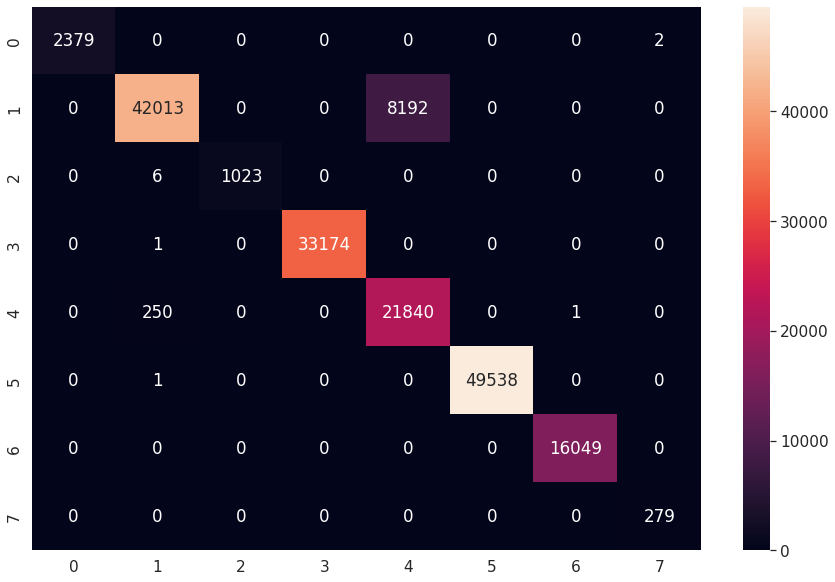

In [ ]:
# confusion matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(15,10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt = 'd') # font size

plt.show()

# K nearest neighbor modeling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('K Nearest Neighbour Classifier')

print('Accuracy = ', metrics.accuracy_score(y_test, y_pred)*100)
# print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred, labels=None, sample_weight=None))
print("Recall =", metrics.recall_score(y_test, y_pred, labels=None, pos_label=1, average='weighted', sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, y_pred, 
                                                                 labels=None, 
                                                                 target_names=['BENIGN', 'NetBIOS', 'LDAP', 'MSSQL', 'Portmap', 'Syn', 'UDP', 'UDPLag'],
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test, y_pred, average='macro'))

K Nearest Neighbour Classifier
Accuracy =  92.48632316249686
Recall = 0.9248632316249685
Classification Report =
               precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      2381
     NetBIOS       0.87      0.87      0.87     50205
        LDAP       0.98      0.97      0.97      1029
       MSSQL       1.00      1.00      1.00     33175
     Portmap       0.70      0.72      0.71     22091
         Syn       1.00      1.00      1.00     49539
         UDP       1.00      1.00      1.00     16049
      UDPLag       0.89      0.91      0.90       279

    accuracy                           0.92    174748
   macro avg       0.93      0.93      0.93    174748
weighted avg       0.93      0.92      0.93    174748

F1 Score =  0.9309747254834055


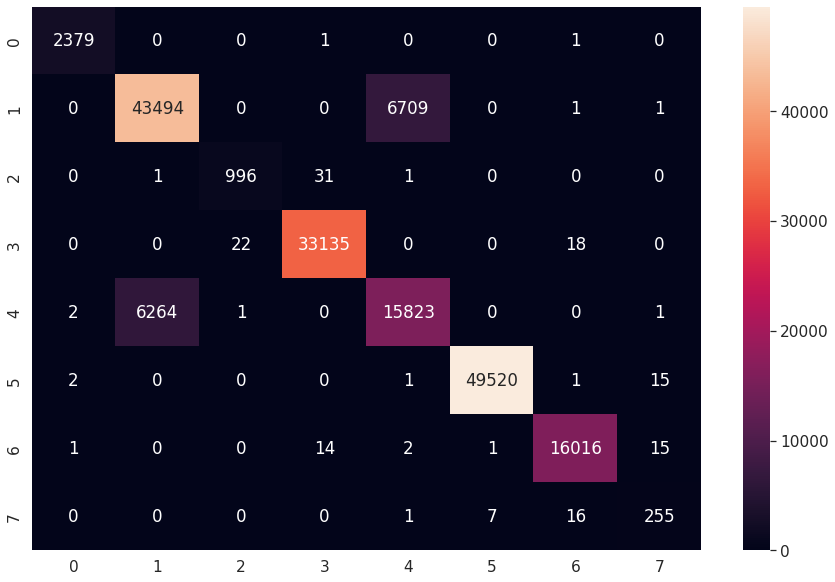

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(15,10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt = 'd') # font size

plt.show()